In [2]:
pip install --upgrade sklearn

Requirement already up-to-date: sklearn in e:\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 觀察原始數據 確認格式相同 所以可以合併再一起

In [40]:
def read_rawdata(root): #讀取根目錄
    dataset = {} #建立字典容器
    files = list(glob.glob(os.path.join(root,'*.csv'))) #讀取目錄內所有ＣＳＶ檔
    
    for file_path in files:
        print(f'read file:{file_path}') #印出所讀取檔案路徑字串
        code = file_path.replace('stock_data\\','').replace('.csv','') #保留個股代碼 以空白取代 路徑 與 附檔名
        df = pd.read_csv(file_path, index_col='date') # 以date當 index合併
        df.sort_index(inplace = True) #以日期順排
        dataset[code] = df
        
    return dataset

In [41]:
ds = read_rawdata('stock_data')

read file:stock_data\0056.csv
read file:stock_data\1101.csv
read file:stock_data\2327.csv
read file:stock_data\2352.csv
read file:stock_data\2385.csv
read file:stock_data\2449.csv
read file:stock_data\2915.csv
read file:stock_data\3005.csv
read file:stock_data\3532.csv
read file:stock_data\6176.csv
read file:stock_data\9945.csv


In [42]:
ds.keys()

dict_keys(['0056', '1101', '2327', '2352', '2385', '2449', '2915', '3005', '3532', '6176', '9945'])

In [43]:
len(ds.values())

11

In [44]:
ds['0056'].isna().sum()

0056_close_y    157
dtype: int64

### 觀察數據

In [45]:
print(ds['9945'])

      9945_Turnover  9945_Volume  9945_close  9945_eps  9945_high  9945_low  \
date                                                                          
6815       146528.0       3785.0       38.80    6.9900      39.00     38.20   
6816       275480.0       7236.0       37.70    6.7900      38.60     37.60   
6817       240982.0       6526.0       37.25    6.7100      37.30     36.70   
6818        94300.0       2540.0       37.05    6.6800      37.50     37.00   
6819       105420.0       2829.0       37.40    6.7400      37.45     37.00   
...             ...          ...         ...       ...        ...       ...   
8082       110213.0       3647.0       30.10    2.7742      30.50     30.00   
8083       138815.0       4426.0       31.45    2.8986      31.70     30.60   
8084       174193.0       5304.0       33.40    3.0783      33.60     32.20   
8085       137763.0       4122.0       33.75    3.1106      33.95     32.75   
8086       138833.0       4005.0       34.80    3.20

In [48]:
ds['9945'].iloc[480:500]

,9945_Turnover,9945_Volume,9945_close,9945_eps,9945_high,9945_low,9945_open,9945_ups_and_downs,9945_ups_percent
date,,,,,,,,,
7524,91469.0,2694.0,34.05,3.54,34.20,33.60,33.80,0.25,0.74
7525,164006.0,4759.0,34.80,3.62,34.80,34.05,34.15,0.75,2.20
7526,201339.0,5761.0,35.05,3.65,35.10,34.70,34.95,0.25,0.72
7529,179230.0,5120.0,35.20,3.66,35.20,34.80,35.00,0.15,0.43
7530,208013.0,5904.0,35.35,3.68,NaN,34.90,35.00,0.15,0.43
7531,126475.0,3577.0,35.30,3.67,35.50,35.15,35.45,-0.05,-0.14
7532,108605.0,3114.0,34.70,3.61,35.35,34.65,35.30,-0.60,-1.70
7533,133151.0,3808.0,35.15,3.66,35.15,34.80,34.80,0.45,1.30
7537,367599.0,10259.0,35.95,3.74,NaN,35.35,35.35,0.80,2.28


### 由9945潤泰新 連續缺值天數（停止交易） 推得 date 7539= 107/9/27

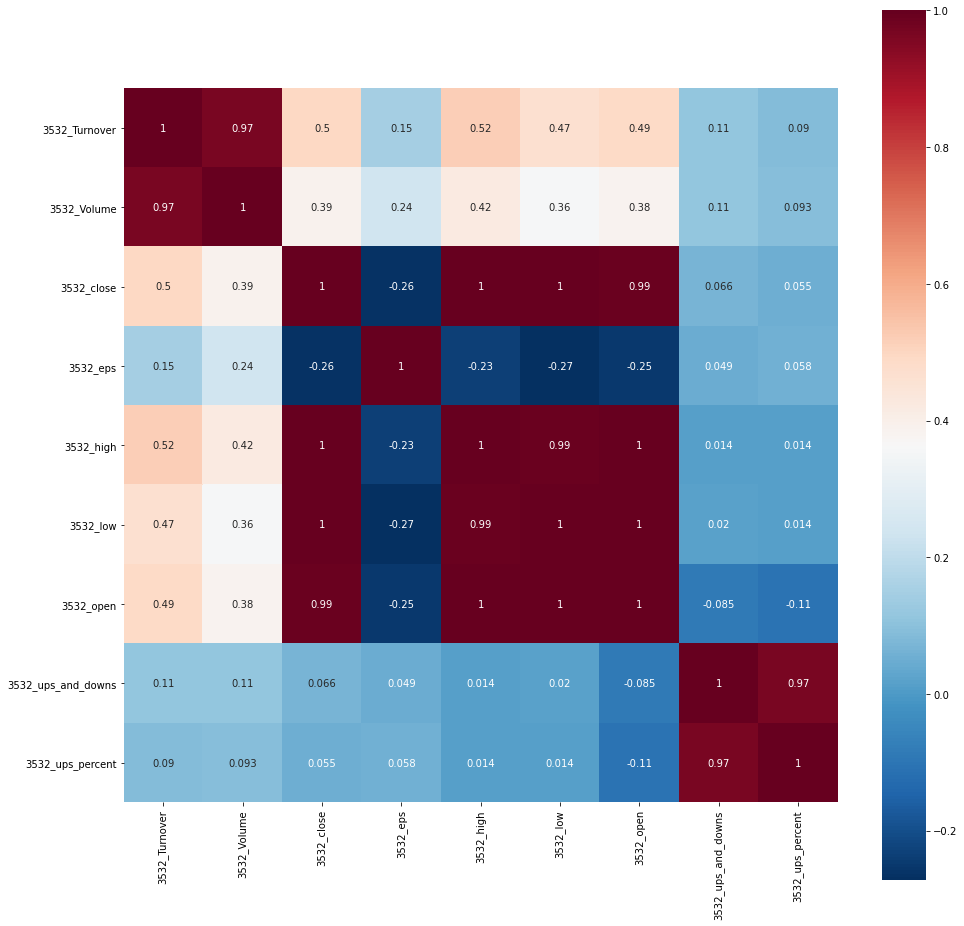

In [50]:
ds9945 =pd.merge(ds["0056"],ds['9945'], left_index=True, right_index=True)
plt.figure(figsize=(16,16))
sns.heatmap(ds["3532"].corr(), square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"
plt.show()

In [51]:
print(ds9945.isna().sum)

<bound method DataFrame.sum of       0056_close_y  9945_Turnover  9945_Volume  9945_close  9945_eps  \
date                                                                   
6815         False          False        False       False     False   
6816         False          False        False       False     False   
6817         False          False        False       False     False   
6818         False          False        False       False     False   
6819         False          False        False       False     False   
...            ...            ...          ...         ...       ...   
8082          True          False        False       False     False   
8083          True          False        False       False     False   
8084          True          False        False       False     False   
8085          True          False        False       False     False   
8086          True          False        False       False     False   

      9945_high  9945_low  9945_

In [52]:
for stock_no ,stock_df in ds.items(): # 查看是否有缺值
       if stock_no !='0056': #只查看成分股 
        print(stock_df.isna().sum()) #顯示缺值欄位 與數量

1101_Turnover          8
1101_Volume           13
1101_close            11
1101_eps              16
1101_high             14
1101_low               7
1101_open             10
1101_ups_and_downs     9
1101_ups_percent      10
dtype: int64
2327_Turnover         27
2327_Volume           25
2327_close            22
2327_eps              20
2327_high             23
2327_low              23
2327_open             19
2327_ups_and_downs    21
2327_ups_percent      16
dtype: int64
2352_Turnover         13
2352_Volume           14
2352_close             8
2352_eps               6
2352_high             15
2352_low              21
2352_open              5
2352_ups_and_downs     8
2352_ups_percent      26
dtype: int64
2385_Turnover          8
2385_Volume           17
2385_close            16
2385_eps              13
2385_high              6
2385_low               5
2385_open              9
2385_ups_and_downs    19
2385_ups_percent      12
dtype: int64
2449_Turnover         13
2449_Volume           1

### 補缺失值

In [53]:
def fill_up_down(datasets):
    for stock_no, stock_df in datasets.items():
            if stock_no != '0056':
                stock_df[f'{stock_no}_ups_and_downs'].fillna(method='ffill', inplace=True) #用昨天的來補 直接inplace 取代

In [54]:
fill_up_down(ds)

In [55]:
for stock_no ,stock_df in ds.items(): # 查看是否有缺值
       if stock_no !='0056': #只查看成分股 
        print(stock_df.isna().sum()) #顯示缺值欄位 與數量

1101_Turnover          8
1101_Volume           13
1101_close            11
1101_eps              16
1101_high             14
1101_low               7
1101_open             10
1101_ups_and_downs     0
1101_ups_percent      10
dtype: int64
2327_Turnover         27
2327_Volume           25
2327_close            22
2327_eps              20
2327_high             23
2327_low              23
2327_open             19
2327_ups_and_downs     0
2327_ups_percent      16
dtype: int64
2352_Turnover         13
2352_Volume           14
2352_close             8
2352_eps               6
2352_high             15
2352_low              21
2352_open              5
2352_ups_and_downs     0
2352_ups_percent      26
dtype: int64
2385_Turnover          8
2385_Volume           17
2385_close            16
2385_eps              13
2385_high              6
2385_low               5
2385_open              9
2385_ups_and_downs     0
2385_ups_percent      12
dtype: int64
2449_Turnover         13
2449_Volume           1

In [56]:
def fill_data(datasets):
    for stock_no, stock_df in datasets.items():
        if stock_no != '0056':
            # 增加欄位-昨日收盤價 close_y
            stock_df[f'{stock_no}_close_y'] = stock_df[f'{stock_no}_close'].shift(1)
            # 增加欄位-明日開盤價 open_t
            stock_df[f'{stock_no}_open_t'] = stock_df[f'{stock_no}_open'].shift(-1)
            # 補EPS
            stock_df[f'{stock_no}_eps'].fillna(method='ffill', inplace=True) #用昨天的來補 一季跳動一次 
            #stock_df[f'{stock_no}_eps'].fillna(method='bfill', inplace=True) #用明天的來補
            # 補收盤價 close = open_t (用明天的開盤價)
            stock_df[f'{stock_no}_close'].fillna(stock_df[f'{stock_no}_open_t'], inplace=True)
            # 補收盤價 close = ups_and_downs + close_y 
            stock_df[f'{stock_no}_close'].fillna(stock_df[f'{stock_no}_close_y']+stock_df[f'{stock_no}_ups_and_downs'], inplace=True)
            # 補開盤價 open = close_y (用昨天的收盤價)
            stock_df[f'{stock_no}_open'].fillna(stock_df[f'{stock_no}_close_y'], inplace=True)
            # 補股價變動 close - close_y
            stock_df[f'{stock_no}_ups_and_downs'].fillna(stock_df[f'{stock_no}_close']-stock_df[f'{stock_no}_close_y'], inplace=True)
            # 補漲跌百分比 Close-Open / close_y
            stock_df[f'{stock_no}_ups_percent'].fillna(stock_df[f'{stock_no}_ups_and_downs']/stock_df[f'{stock_no}_close_y'], inplace=True)
            # 補成交金額 turnover = volumn * ((high+low)/2)
            stock_df[f'{stock_no}_Turnover'].fillna(stock_df[f'{stock_no}_Volume']*((stock_df[f'{stock_no}_high']+stock_df[f'{stock_no}_low'])/2), inplace=True)
            # 補成交量 volumn = turnover / ((high+low)/2)
            stock_df[f'{stock_no}_Volume'].fillna(stock_df[f'{stock_no}_Turnover']/((stock_df[f'{stock_no}_high']+stock_df[f'{stock_no}_low'])/2), inplace=True)
             # 補今日高點 high = (turnover / volumn)*2 - low
            stock_df[f'{stock_no}_high'].fillna((stock_df[f'{stock_no}_Turnover']/stock_df[f'{stock_no}_Volume'])*2-stock_df[f'{stock_no}_low'], inplace=True)
            # 補今日低點 low = (turnover / volumn)*2 - high
            stock_df[f'{stock_no}_low'].fillna((stock_df[f'{stock_no}_Turnover']/stock_df[f'{stock_no}_Volume'])*2-stock_df[f'{stock_no}_high'], inplace=True)
            # 補今日高點 high
            stock_df[f'{stock_no}_high'].fillna(method='bfill', inplace=True) 
            # 補今日低點 low
            stock_df[f'{stock_no}_low'].fillna(method='bfill', inplace=True)
            # 補成交金額 turnover = volumn * ((high+low)/2)
            stock_df[f'{stock_no}_Turnover'].fillna(stock_df[f'{stock_no}_Volume']*((stock_df[f'{stock_no}_high']+stock_df[f'{stock_no}_low'])/2), inplace=True)
            
            stock_df[f'{stock_no}_close'].fillna(method='ffill', inplace=True) #用昨天的來補


In [57]:
fill_data(ds)

In [58]:
for stock_no, stock_df in ds.items(): # 查看是否還有缺值
    if stock_no != '0056':
        print(stock_df.isna().sum())

1101_Turnover          2
1101_Volume            3
1101_close             0
1101_eps               0
1101_high              0
1101_low               0
1101_open              1
1101_ups_and_downs     0
1101_ups_percent       1
1101_close_y          12
1101_open_t           11
dtype: int64
2327_Turnover         12
2327_Volume           14
2327_close             0
2327_eps               0
2327_high              0
2327_low               0
2327_open              9
2327_ups_and_downs     0
2327_ups_percent       9
2327_close_y          23
2327_open_t           20
dtype: int64
2352_Turnover         0
2352_Volume           4
2352_close            0
2352_eps              0
2352_high             0
2352_low              0
2352_open             0
2352_ups_and_downs    0
2352_ups_percent      0
2352_close_y          9
2352_open_t           6
dtype: int64
2385_Turnover          3
2385_Volume            5
2385_close             0
2385_eps               0
2385_high              0
2385_low              

In [59]:
def remove_features(datasets):
    for stock_no, stock_df in datasets.items():
        if stock_no != '0056':
            # 移除不要的特徵(欄位)
            stock_df.drop(columns=[f'{stock_no}_close_y', f'{stock_no}_open_t'], inplace=True)
            stock_df.drop(columns=[f'{stock_no}_high', f'{stock_no}_low'], inplace=True)
            stock_df.drop(columns=[f'{stock_no}_Turnover', f'{stock_no}_Volume'], inplace=True)
            stock_df.drop(columns=[f'{stock_no}_open'], inplace=True)
            stock_df.drop(columns=[f'{stock_no}_ups_and_downs'], inplace=True)
            stock_df.drop(columns=[f'{stock_no}_ups_percent'], inplace=True)
            #stock_df.drop(columns=[f'{stock_no}_eps'], inplace=True)

In [60]:
remove_features(ds)

In [61]:
for stock_no, stock_df in ds.items(): # 查看是否還有缺值
    if stock_no != '0056':
        print(stock_df.isna().sum())

1101_close    0
1101_eps      0
dtype: int64
2327_close    0
2327_eps      0
dtype: int64
2352_close    0
2352_eps      0
dtype: int64
2385_close    0
2385_eps      0
dtype: int64
2449_close    0
2449_eps      0
dtype: int64
2915_close    0
2915_eps      0
dtype: int64
3005_close    0
3005_eps      0
dtype: int64
3532_close    0
3532_eps      0
dtype: int64
6176_close    0
6176_eps      0
dtype: int64
9945_close    0
9945_eps      0
dtype: int64


In [62]:
stock_df

,9945_close,9945_eps
date,,
6815,38.80,6.9900
6816,37.70,6.7900
6817,37.25,6.7100
6818,37.05,6.6800
6819,37.40,6.7400
...,...,...
8082,30.10,2.7742
8083,31.45,2.8986
8084,33.40,3.0783


In [63]:
from sklearn.preprocessing import MinMaxScaler #數據正規話 svr 才部會有問題
scaler = MinMaxScaler() #建立一個縮放器

In [64]:
for stock_no, stock_df in ds.items():
    if stock_no != '0056':
        sc_data = stock_df.columns[~stock_df.columns.isin([f'{stock_no}_ups_and_downs', f'{stock_no}_ups_percent'])]#排除ups_and_downs與ups_percent 其餘欄位取0~1 正規化
        stock_df[sc_data] = scaler.fit_transform(stock_df[sc_data])

In [65]:
stock_df #確認有正規化

,9945_close,9945_eps
date,,
6815,0.486842,0.690049
6816,0.438596,0.657423
6817,0.418860,0.644372
6818,0.410088,0.639478
6819,0.425439,0.649266
...,...,...
8082,0.105263,0.002316
8083,0.164474,0.022610
8084,0.250000,0.051925
